### A new visualization notebook 
With the new epoch data and the working montage file   
NOTE: We placed the working montage file for the ANT Duke Waveguard 128 ch cap in the mne python source code  
(/Users/shateeshbhugwansing/anaconda/envs/mne/lib/python3.6/site-packages/mne/channels/data/montages) folder for easy access.

In [2]:
# %run ../preprocessing/StimCodes.ipynb
import mne
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline 

import matplotlib
matplotlib.rcParams.update({'font.size': 11})

In [3]:
montage = mne.channels.read_montage(kind="ANT_DukeWaveGuard_128_electrode_montages_updated_V4")


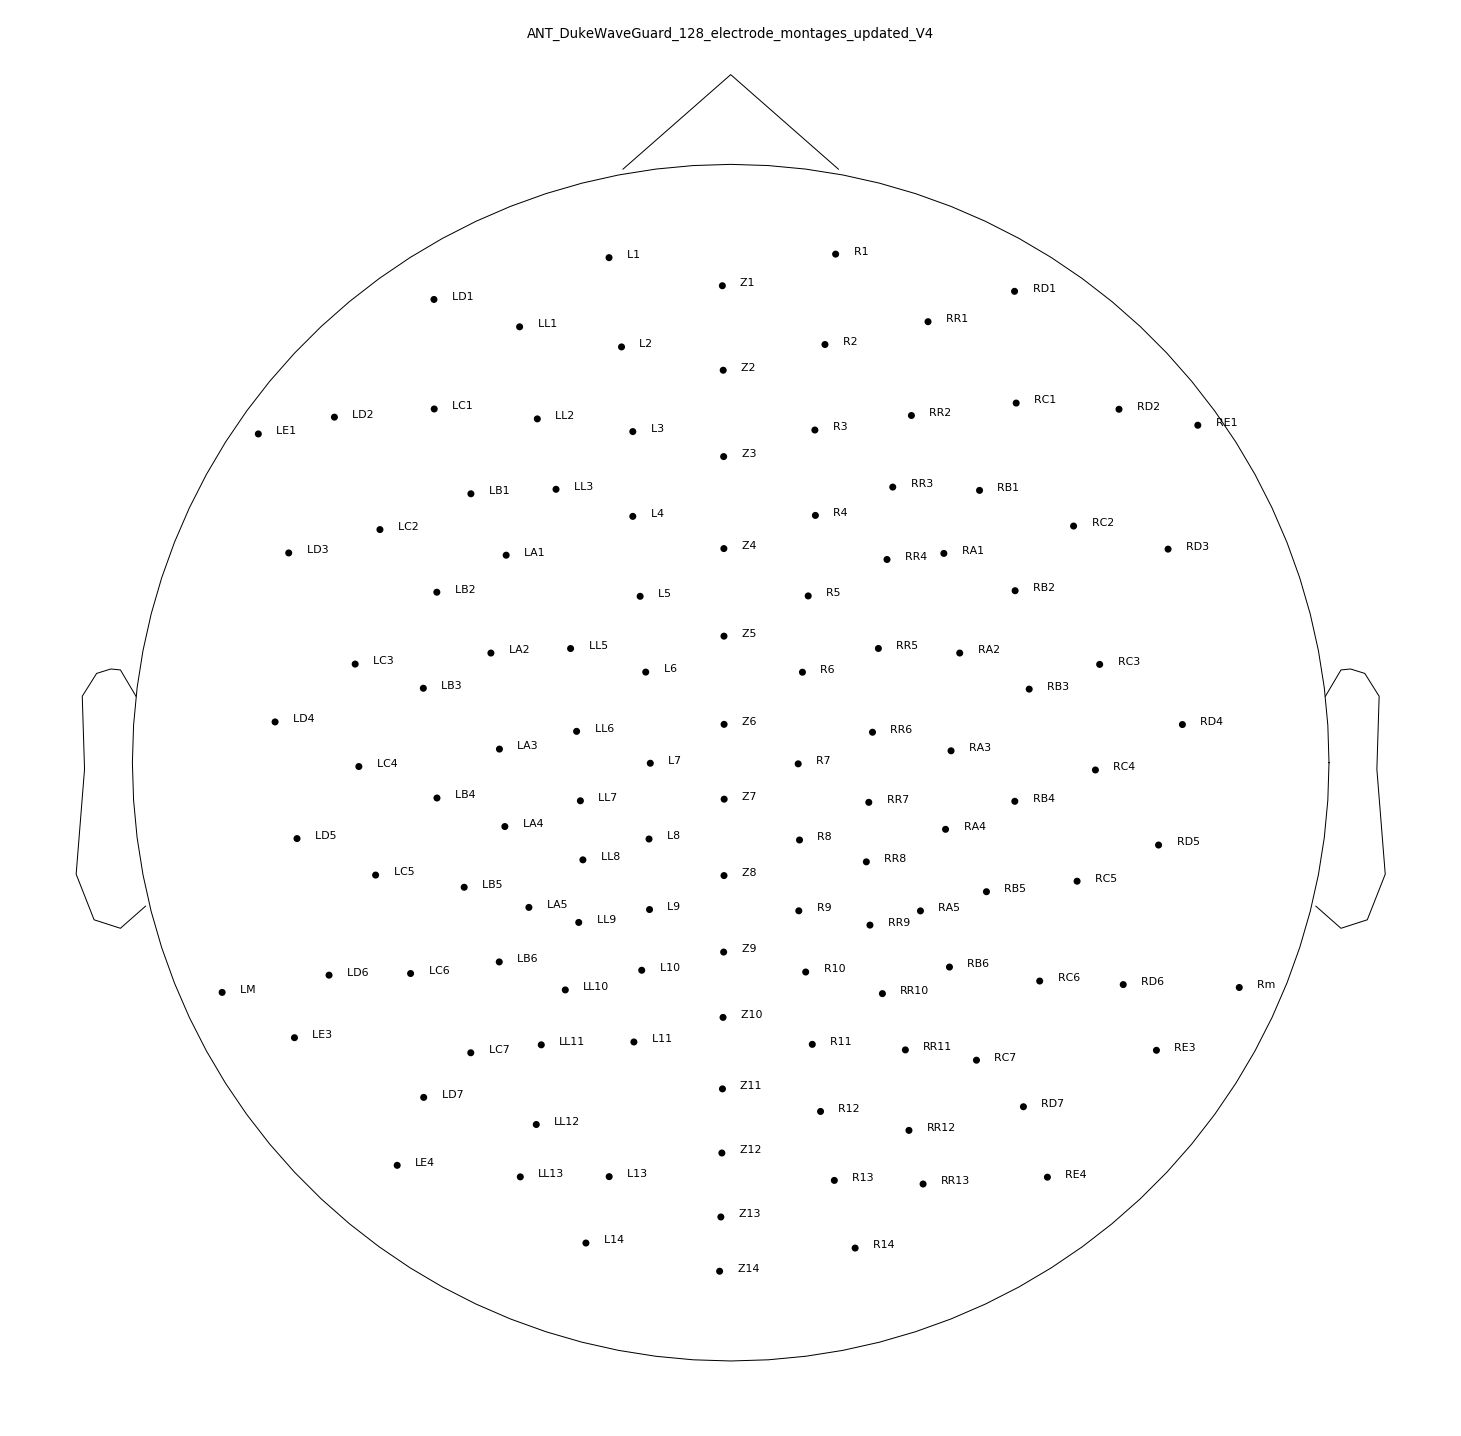

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 15
montage.plot(); 

In [5]:
# read in data 
# epoch_path = '/Volumes/SB/stim_code_epochs/20131216_1441_epo.fif'
epoch_path = '/Volumes/SB/stim_code_epochs/20140205_1114_epo.fif'
epoch = mne.read_epochs(epoch_path, preload=True)

Reading /Volumes/SB/stim_code_epochs/20140205_1114_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    1949.22 ms
        0 CTF compensation matrices available
951 matching events found
Applying baseline correction (mode: mean)
951 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [6]:
epoch.set_montage(montage)

The following EEG sensors did not have a position specified in the selected montage: ['Nasium', 'LL4', 'L12', 'VEOG']. Their position has been left untouched.


<ipython-input-6-2b9523d69e31>:1: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['Nasium', 'LL4', 'L12', 'VEOG']. Their position has been left untouched.
  epoch.set_montage(montage)


<EpochsFIF  |   951 events (all good), 0 - 1.94922 sec, baseline [0, 0], ~468.3 MB, data loaded,
 'b-f1-pic': 40
 'b-f1-snd': 60
 'b-f1-spk': 80
 'b-f1-wrd': 39
 'b-f2-pic': 40
 'b-f2-snd': 60
 'b-f2-spk': 80
 'b-f2-wrd': 39
 'b-tg-pic': 40
 'b-tg-snd': 80
 'b-tg-spk': 79
 'b-tg-wrd': 20
 'f-f1-pic': 40
 'f-f1-snd': 20
 'f-f1-spk': 19
 'f-f1-wrd': 19
 'f-f2-pic': 40
 'f-f2-snd': 20
 'f-f2-spk': 19
 'f-f2-wrd': 19
 'f-tg-pic': 19
 'f-tg-snd': 59
 'f-tg-spk': 0
 'f-tg-wrd': 20>

#### Drop the bad channels: Lm, Rm, Nasium, VEOG

In [7]:
## Drop the bad channels 
epoch.ch_names

['Lm',
 'LE1',
 'Nasium',
 'LE3',
 'LD2',
 'LD5',
 'LC3',
 'LC6',
 'LB1',
 'LB4',
 'LA2',
 'LA5',
 'LL1',
 'LL4',
 'LL7',
 'LL10',
 'LL13',
 'L3',
 'L6',
 'L9',
 'L12',
 'Z1',
 'Z4',
 'Z7',
 'Z10',
 'Z13',
 'R3',
 'R6',
 'R9',
 'R12',
 'RR1',
 'RR4',
 'RR7',
 'RR10',
 'RR13',
 'RA2',
 'RA5',
 'RB1',
 'RB4',
 'RC3',
 'RC6',
 'RD2',
 'RD5',
 'RE1',
 'VEOG',
 'RE3',
 'Rm',
 'RE4',
 'RD1',
 'RD3',
 'RD4',
 'RD6',
 'RD7',
 'RC1',
 'RC2',
 'RC4',
 'RC5',
 'RC7',
 'RB2',
 'RB3',
 'RB5',
 'RB6',
 'RA1',
 'RA3',
 'RA4',
 'RR2',
 'RR3',
 'RR5',
 'RR6',
 'RR8',
 'RR9',
 'RR11',
 'RR12',
 'R1',
 'R2',
 'R4',
 'R5',
 'R7',
 'R8',
 'R10',
 'R11',
 'R13',
 'R14',
 'Z2',
 'Z3',
 'Z5',
 'Z6',
 'Z8',
 'Z9',
 'Z11',
 'Z12',
 'Z14',
 'L1',
 'L2',
 'L4',
 'L5',
 'L7',
 'L8',
 'L10',
 'L11',
 'L13',
 'L14',
 'LL2',
 'LL3',
 'LL5',
 'LL6',
 'LL8',
 'LL9',
 'LL11',
 'LL12',
 'LA1',
 'LA3',
 'LA4',
 'LB2',
 'LB3',
 'LB5',
 'LB6',
 'LC1',
 'LC2',
 'LC4',
 'LC5',
 'LC7',
 'LD1',
 'LD3',
 'LD4',
 'LD6',
 'LD7',
 

In [8]:
epoch.drop_channels(['Lm', 'Rm', 'Nasium', 'VEOG'])

<EpochsFIF  |   951 events (all good), 0 - 1.94922 sec, baseline [0, 0], ~453.8 MB, data loaded,
 'b-f1-pic': 40
 'b-f1-snd': 60
 'b-f1-spk': 80
 'b-f1-wrd': 39
 'b-f2-pic': 40
 'b-f2-snd': 60
 'b-f2-spk': 80
 'b-f2-wrd': 39
 'b-tg-pic': 40
 'b-tg-snd': 80
 'b-tg-spk': 79
 'b-tg-wrd': 20
 'f-f1-pic': 40
 'f-f1-snd': 20
 'f-f1-spk': 19
 'f-f1-wrd': 19
 'f-f2-pic': 40
 'f-f2-snd': 20
 'f-f2-spk': 19
 'f-f2-wrd': 19
 'f-tg-pic': 19
 'f-tg-snd': 59
 'f-tg-spk': 0
 'f-tg-wrd': 20>

In [9]:
epoch.ch_names

['LE1',
 'LE3',
 'LD2',
 'LD5',
 'LC3',
 'LC6',
 'LB1',
 'LB4',
 'LA2',
 'LA5',
 'LL1',
 'LL4',
 'LL7',
 'LL10',
 'LL13',
 'L3',
 'L6',
 'L9',
 'L12',
 'Z1',
 'Z4',
 'Z7',
 'Z10',
 'Z13',
 'R3',
 'R6',
 'R9',
 'R12',
 'RR1',
 'RR4',
 'RR7',
 'RR10',
 'RR13',
 'RA2',
 'RA5',
 'RB1',
 'RB4',
 'RC3',
 'RC6',
 'RD2',
 'RD5',
 'RE1',
 'RE3',
 'RE4',
 'RD1',
 'RD3',
 'RD4',
 'RD6',
 'RD7',
 'RC1',
 'RC2',
 'RC4',
 'RC5',
 'RC7',
 'RB2',
 'RB3',
 'RB5',
 'RB6',
 'RA1',
 'RA3',
 'RA4',
 'RR2',
 'RR3',
 'RR5',
 'RR6',
 'RR8',
 'RR9',
 'RR11',
 'RR12',
 'R1',
 'R2',
 'R4',
 'R5',
 'R7',
 'R8',
 'R10',
 'R11',
 'R13',
 'R14',
 'Z2',
 'Z3',
 'Z5',
 'Z6',
 'Z8',
 'Z9',
 'Z11',
 'Z12',
 'Z14',
 'L1',
 'L2',
 'L4',
 'L5',
 'L7',
 'L8',
 'L10',
 'L11',
 'L13',
 'L14',
 'LL2',
 'LL3',
 'LL5',
 'LL6',
 'LL8',
 'LL9',
 'LL11',
 'LL12',
 'LA1',
 'LA3',
 'LA4',
 'LB2',
 'LB3',
 'LB5',
 'LB6',
 'LC1',
 'LC2',
 'LC4',
 'LC5',
 'LC7',
 'LD1',
 'LD3',
 'LD4',
 'LD6',
 'LD7',
 'LE4',
 'STI 014']

In [10]:
# remove missing channels 'LL4', 'L12'
epoch.drop_channels(['LL4', 'L12'])


<EpochsFIF  |   951 events (all good), 0 - 1.94922 sec, baseline [0, 0], ~446.5 MB, data loaded,
 'b-f1-pic': 40
 'b-f1-snd': 60
 'b-f1-spk': 80
 'b-f1-wrd': 39
 'b-f2-pic': 40
 'b-f2-snd': 60
 'b-f2-spk': 80
 'b-f2-wrd': 39
 'b-tg-pic': 40
 'b-tg-snd': 80
 'b-tg-spk': 79
 'b-tg-wrd': 20
 'f-f1-pic': 40
 'f-f1-snd': 20
 'f-f1-spk': 19
 'f-f1-wrd': 19
 'f-f2-pic': 40
 'f-f2-snd': 20
 'f-f2-spk': 19
 'f-f2-wrd': 19
 'f-tg-pic': 19
 'f-tg-snd': 59
 'f-tg-spk': 0
 'f-tg-wrd': 20>

In [11]:
len(epoch.ch_names)

123

## Classification experiment (to generate coefficients)
Audio vs. Visual  
data: stim_code_epochs/20131216_1441_epo.fif  
classifier: Logistic regression  


In [12]:
%run ../preprocessing/Artifact_Removal/Extract_Describer_Events.ipynb
%run ../preprocessing/Artifact_Removal/preprocecssing_helpers.ipynb
%run ../preprocessing/Artifact_Removal/Batch_ArtifactFilter_Epoch.ipynb
%run ../preprocessing/StimCodes.ipynb
%run ../Classification/ConcatEpochTrails.ipynb


ERROR:root:File `'preprocecssing_helpers.ipynb.py'` not found.
ERROR:root:File `'Batch_ArtifactFilter_Epoch.ipynb.py'` not found.
ERROR:root:File `'preprocecssing_helpers.ipynb.py'` not found.


In [13]:
audio_visual = convert_epoch_events_to_stim_combinations(epoch)

In [14]:
audio_visual

array([[  9559,      0,   1112],
       [  9843,      0,   1112],
       [ 10110,      0,   1112],
       ...,
       [423929,      0,    812],
       [424170,      0,    812],
       [424420,      0,    812]])

In [255]:
# replace the epoch.events with this audio_visual array


In [18]:
epoch.events = audio_visual


In [19]:
audio_visual[:,-1]

array([1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112,
       1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112,
       1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112,
       1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112,
       1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112,
       1112, 1112, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012,
       1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012,
       1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012,
       1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012,
       1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012,
       1012, 1012, 1012, 1012, 1012, 1012, 1012,  312,  312,  312,  312,
        312,  312,  312,  312,  312,  312,  312,  312,  312,  312,  312,
        312,  312,  312,  312,  312,  312,  312,  312,  312,  312,  312,
        312,  312,  312,  312,  312,  312,  312,  3

### epoch object has been updated with events that can be used for classification
epoch.events[:,-1] < 700 = audio  
epoch.events[:,-1] > 700 = visual

In [20]:
# create a labels array
# let 0 = audio, 1 = visual

labels = [0 if (x < 700) else 1 for x in audio_visual[:,-1]]

In [21]:
labels_np = np.array(labels)

In [22]:
# get imports used for classification algos 

from mne.decoding import Vectorizer, get_coef
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC  # noqa
from sklearn.model_selection import ShuffleSplit  # noqa

from sklearn.metrics import confusion_matrix
from mne.viz import tight_layout

In [23]:
# perform logistic regression, use cross validation

clf = make_pipeline(
                    Vectorizer(),
#                     MinMaxScaler(),
                    LogisticRegression(C=1))

cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
# vectorizer = Vectorizer()
# data = vectorizer.fit_transform(filtered_epoch_lex._data)
# clf = LogisticRegression()


In [24]:
preds = np.empty(len(epoch._data))
coeff = []
data = epoch._data

In [27]:
for train, test in cv.split(data, labels_np):
    clf.fit(data[train], labels_np[train])
    coeff.append(get_coef(clf,'coef_'))
    preds[test] = clf.predict(data[test])
    
target_names = [ 'Audio', 'Visual']
report = classification_report(labels, preds, target_names=target_names)
print(report)

             precision    recall  f1-score   support

      Audio       0.69      0.68      0.69       654
     Visual       0.32      0.34      0.33       297

avg / total       0.58      0.57      0.57       951



In [28]:
from sklearn.model_selection import cross_val_score


In [29]:
scores = cross_val_score(clf, data, labels, cv=10, scoring='accuracy')

In [30]:
scores

array([0.59375   , 0.4375    , 0.54166667, 0.60416667, 0.51578947,
       0.53684211, 0.58947368, 0.5       , 0.57446809, 0.64893617])

# TO DO:
1. analyze the coefficients
    1. reshape them into 123x500 (currently in vectorized form (1x61500)
    2. for each coefficient matrix, find mean across 500ms. 
    3. find the channels (rows)  with the highest mean. 
    4. Compare them across all coeff matricies. Are the channels  the same? 

In [231]:
def reshape_coeff_matrix(x, step = 500):
    """
    A method to reshape a 1D list of coefficients into the coefficient matrix: 
    example: (1, 615000) --> (123, 500)
    
    NOTE: YOU NEED TO IMPORT numpy as np to use this method
    
    Arguments: 
    - x = the current, 1D list of coefficients that needs to be reshaped. 
    - step = the desired length of one row in the new matrix (default = 500)
    
    Return:
    - A 2D np array with the desired shape
    """
    reshaped = []
    
    for i in range(0,len(x), step): 
        temp = []
        for j in range(i,i+step):
            temp.append(x[j])
    
        reshaped.append(temp)
    
    return np.array(reshaped)

    
    
    

In [269]:
# Use the helper function to reshape all of the coefficients in coeff
coeff_matrices = []

for i in coeff:
    coeff_matrices.append(reshape_coeff_matrix(i[0]))

In [270]:
print(len(coeff_matrices))
print(type(coeff_matrices[0]))
print("Are the coeff matrices the same now? : ", coeff_matrices[0] == coeff_matrices[1])

10
<class 'numpy.ndarray'>
Are the coeff matrices the same now? :  [[ True False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False False False]
 ...
 [ True False False ... False False False]
 [ True False False ... False False False]
 [False False False ... False False False]]


## Ranking the channel + coefficients 
- To do this, I'm going to rank the channels based on the mean of their coefficients over the 500ms period. 
- Do this for each ofthe 10 coefficient matricies that are produced. 
- The hypothesis is that the same channels should appear at the top, meaning they are the same channels being used to do the classification every time (highest coefficients)

In [272]:
coeff_matrices_mean = []

for x in coeff_matrices:
    avg = []
    for i in range(len(x)):
        avg.append(np.mean(x[i]))
    coeff_matrices_mean.append(avg)


    

In [286]:
coeff_matrices_mean_np = np.array(coeff_matrices_mean)

In [287]:
coeff_matrices_mean_np.shape

(10, 123)

In [292]:
# map the means to the channels

coeff_means_channels = []

for x in range(len(coeff_matrices_mean_np)):
    coeff_means_channels.append(dict(zip(channels, coeff_matrices_mean_np[x])))


In [297]:
coeff_means_channels[0]

{'LE1': 0.00010442537349236326,
 'LE3': 2.017495533231014e-05,
 'LD2': 5.628114497199313e-05,
 'LD5': 5.468618494690916e-05,
 'LC3': -4.433747120132114e-05,
 'LC6': -4.08667537309585e-06,
 'LB1': -5.826347868533977e-05,
 'LB4': -3.350194031928799e-05,
 'LA2': -3.927725285436093e-05,
 'LA5': -2.1456744254420303e-05,
 'LL1': -2.1298934010779765e-05,
 'LL7': -8.527260475232734e-06,
 'LL10': -1.2874066909623518e-05,
 'LL13': 3.3447508712420713e-06,
 'L3': -9.529785289386378e-06,
 'L6': 3.880122813077994e-06,
 'L9': -8.205748075637723e-06,
 'Z1': 8.129151231029845e-06,
 'Z4': 1.3717984882971465e-05,
 'Z7': 4.712499389360712e-06,
 'Z10': -1.3513774517869552e-05,
 'Z13': 3.1742671124979118e-06,
 'R3': 1.1496008555827284e-05,
 'R6': 1.404205163845194e-05,
 'R9': -1.976697298202507e-06,
 'R12': 1.0555233600378998e-07,
 'RR1': 1.1640666939035322e-05,
 'RR4': 2.708301122886577e-05,
 'RR7': 1.982684212749349e-05,
 'RR10': -1.1847869252330848e-05,
 'RR13': -5.589764359364789e-05,
 'RA2': 4.03807676

In [298]:
# convert all mean coefficients to abs value 

for d in coeff_means_channels:
    for k in d: 
        d[k] = abs(d[k])

In [299]:
coeff_means_channels[0]

{'LE1': 0.00010442537349236326,
 'LE3': 2.017495533231014e-05,
 'LD2': 5.628114497199313e-05,
 'LD5': 5.468618494690916e-05,
 'LC3': 4.433747120132114e-05,
 'LC6': 4.08667537309585e-06,
 'LB1': 5.826347868533977e-05,
 'LB4': 3.350194031928799e-05,
 'LA2': 3.927725285436093e-05,
 'LA5': 2.1456744254420303e-05,
 'LL1': 2.1298934010779765e-05,
 'LL7': 8.527260475232734e-06,
 'LL10': 1.2874066909623518e-05,
 'LL13': 3.3447508712420713e-06,
 'L3': 9.529785289386378e-06,
 'L6': 3.880122813077994e-06,
 'L9': 8.205748075637723e-06,
 'Z1': 8.129151231029845e-06,
 'Z4': 1.3717984882971465e-05,
 'Z7': 4.712499389360712e-06,
 'Z10': 1.3513774517869552e-05,
 'Z13': 3.1742671124979118e-06,
 'R3': 1.1496008555827284e-05,
 'R6': 1.404205163845194e-05,
 'R9': 1.976697298202507e-06,
 'R12': 1.0555233600378998e-07,
 'RR1': 1.1640666939035322e-05,
 'RR4': 2.708301122886577e-05,
 'RR7': 1.982684212749349e-05,
 'RR10': 1.1847869252330848e-05,
 'RR13': 5.589764359364789e-05,
 'RA2': 4.038076763386191e-05,
 '

In [300]:
# sort each dictionary in coeff_means_channels in order to rank them. should expect to see the same channels at the top
# for each dict


In [301]:
sorted_means_channels = []

for x in range(len(coeff_means_channels)):
    d = coeff_means_channels[x]
    sorted_means_channels.append(sorted(d, key=d.get, reverse=True))

In [302]:
sorted_means_channels[0]

['STI 014',
 'RC2',
 'LE1',
 'LC1',
 'LB2',
 'RB2',
 'LB1',
 'LD3',
 'LD2',
 'RR13',
 'LB3',
 'LD5',
 'LD4',
 'RC3',
 'RC4',
 'RA1',
 'LC3',
 'RE3',
 'LA1',
 'RA2',
 'RB3',
 'LA2',
 'RB1',
 'RR12',
 'LB4',
 'LC2',
 'LD1',
 'RC6',
 'RC7',
 'LA3',
 'LA4',
 'RE1',
 'RR6',
 'RD7',
 'LL3',
 'RR4',
 'LL2',
 'RD6',
 'RR3',
 'LC5',
 'RA3',
 'LA5',
 'LL1',
 'RR2',
 'LE3',
 'LC4',
 'RR7',
 'RR5',
 'R10',
 'LL5',
 'R6',
 'R11',
 'Z4',
 'Z10',
 'R4',
 'RC1',
 'RB6',
 'Z9',
 'LL10',
 'RA4',
 'R2',
 'LL11',
 'RR10',
 'RR1',
 'R3',
 'RD2',
 'R5',
 'L8',
 'RD5',
 'LL6',
 'R7',
 'L10',
 'L3',
 'L11',
 'L14',
 'LL7',
 'L9',
 'Z1',
 'R1',
 'L7',
 'Z11',
 'L2',
 'Z5',
 'Z6',
 'RR9',
 'LL8',
 'LD7',
 'Z3',
 'LE4',
 'LL9',
 'L1',
 'Z7',
 'RA5',
 'LC6',
 'RC5',
 'L6',
 'LD6',
 'LL12',
 'LC7',
 'RB4',
 'LL13',
 'L5',
 'Z13',
 'RR8',
 'RD3',
 'L4',
 'Z8',
 'R13',
 'L13',
 'RR11',
 'LB6',
 'RB5',
 'R9',
 'RE4',
 'RD1',
 'R8',
 'R14',
 'Z12',
 'LB5',
 'Z2',
 'Z14',
 'R12',
 'RD4']

In [303]:
sorted_means_channels[1]

['STI 014',
 'RC2',
 'RR13',
 'RE3',
 'LC1',
 'RC1',
 'RR12',
 'RB2',
 'RC3',
 'RC4',
 'LD1',
 'RB1',
 'RB3',
 'RD7',
 'RC6',
 'RC7',
 'RA1',
 'LC3',
 'RD6',
 'RE4',
 'LC2',
 'RA2',
 'RE1',
 'Z10',
 'RD5',
 'Z9',
 'LL2',
 'LL1',
 'L11',
 'LD6',
 'LC4',
 'RB6',
 'LB3',
 'RR4',
 'R10',
 'Z14',
 'RR2',
 'RR10',
 'R12',
 'RR6',
 'Z11',
 'L13',
 'R13',
 'R11',
 'Z13',
 'LB2',
 'LB1',
 'R14',
 'LL12',
 'LL13',
 'LD3',
 'LD2',
 'LE4',
 'RA3',
 'RR3',
 'RR11',
 'LL11',
 'RA5',
 'LA5',
 'Z12',
 'RD2',
 'LD4',
 'LL10',
 'LD5',
 'LD7',
 'L5',
 'LC7',
 'R6',
 'RR7',
 'RR9',
 'L6',
 'Z4',
 'L1',
 'RR5',
 'LL7',
 'L8',
 'L9',
 'L10',
 'L14',
 'L2',
 'LL9',
 'L4',
 'R4',
 'RD1',
 'LC6',
 'LL8',
 'LB5',
 'R3',
 'Z6',
 'R9',
 'LB4',
 'R5',
 'LB6',
 'Z5',
 'Z8',
 'RR1',
 'RA4',
 'L3',
 'RD4',
 'LA1',
 'R2',
 'Z1',
 'RD3',
 'Z3',
 'LL5',
 'LL3',
 'RB4',
 'LA2',
 'RC5',
 'Z7',
 'R7',
 'R1',
 'Z2',
 'RB5',
 'LE3',
 'LL6',
 'L7',
 'LE1',
 'RR8',
 'LA3',
 'LA4',
 'LC5',
 'R8']

In [304]:
sorted_means_channels[2]

['STI 014',
 'LE1',
 'RC2',
 'RR13',
 'LD3',
 'LD2',
 'LD5',
 'LD4',
 'LC1',
 'RR12',
 'LB2',
 'RB2',
 'LB3',
 'LB1',
 'RC3',
 'RA1',
 'RC4',
 'RD7',
 'RE3',
 'RB3',
 'LA1',
 'RC6',
 'RC7',
 'RA2',
 'LA2',
 'LC3',
 'LE3',
 'LB4',
 'RB1',
 'LA4',
 'LA3',
 'RD6',
 'RR6',
 'R10',
 'R11',
 'RB6',
 'RR4',
 'LL3',
 'Z9',
 'LC2',
 'Z10',
 'LA5',
 'RR10',
 'RR3',
 'LC5',
 'R2',
 'RR2',
 'RA3',
 'LL11',
 'L14',
 'LL10',
 'L11',
 'L1',
 'RA5',
 'Z1',
 'R3',
 'RR7',
 'LL5',
 'RE1',
 'LL2',
 'RR9',
 'RR5',
 'L10',
 'L8',
 'R4',
 'L9',
 'LC4',
 'Z11',
 'RR1',
 'R6',
 'LL7',
 'R1',
 'R9',
 'LL8',
 'LL9',
 'Z4',
 'RA4',
 'LL6',
 'L7',
 'LD1',
 'Z8',
 'RD2',
 'RB5',
 'Z12',
 'LD7',
 'R5',
 'Z5',
 'L6',
 'LL1',
 'Z6',
 'RE4',
 'LE4',
 'RR8',
 'LL12',
 'Z3',
 'RD3',
 'R8',
 'LC7',
 'L5',
 'Z2',
 'RC1',
 'RC5',
 'LD6',
 'L3',
 'LL13',
 'RD4',
 'RD5',
 'R12',
 'R7',
 'Z14',
 'L2',
 'RB4',
 'L4',
 'Z7',
 'R13',
 'LC6',
 'RD1',
 'LB5',
 'Z13',
 'L13',
 'R14',
 'RR11',
 'LB6']

## Analysis of these sorted channel names 

In [366]:
# take the top 30 ranking channels, based on their mean coefficients, from all 10 iterations of the classification.
# Are the top 30 the same across all 10 iterations?
# note: I took the top 30, because 30 is roughly 25% of 123

top20 = []

for x in sorted_means_channels:
    top20.append(x[:20])

In [367]:
top20_np = np.array(top20)

In [368]:
top20_np.shape

(10, 20)

In [370]:
top20_flat = top20_np.flatten()

In [371]:
top20_flat.shape

(200,)

In [372]:
from collections import Counter

data = Counter(top20_flat)

In [373]:
data

Counter({'STI 014': 10,
         'RC2': 9,
         'LE1': 9,
         'LC1': 10,
         'LB2': 9,
         'RB2': 9,
         'LB1': 9,
         'LD3': 8,
         'LD2': 8,
         'RR13': 9,
         'LB3': 9,
         'LD5': 8,
         'LD4': 8,
         'RC3': 9,
         'RC4': 8,
         'RA1': 8,
         'LC3': 7,
         'RE3': 7,
         'LA1': 6,
         'RA2': 2,
         'RC1': 2,
         'RR12': 6,
         'LD1': 1,
         'RB1': 3,
         'RB3': 3,
         'RD7': 3,
         'RC6': 1,
         'RC7': 1,
         'RD6': 1,
         'RE4': 1,
         'RE1': 1,
         'LB4': 2,
         'LA2': 2,
         'LC4': 1,
         'LC2': 1,
         'LA4': 1,
         'LE3': 2,
         'RD1': 1,
         'LE4': 1,
         'LL13': 1,
         'Z13': 1,
         'R14': 1,
         'LB6': 1})

In [374]:
data.pop('STI 014')

10

In [376]:
len(data.keys())

42

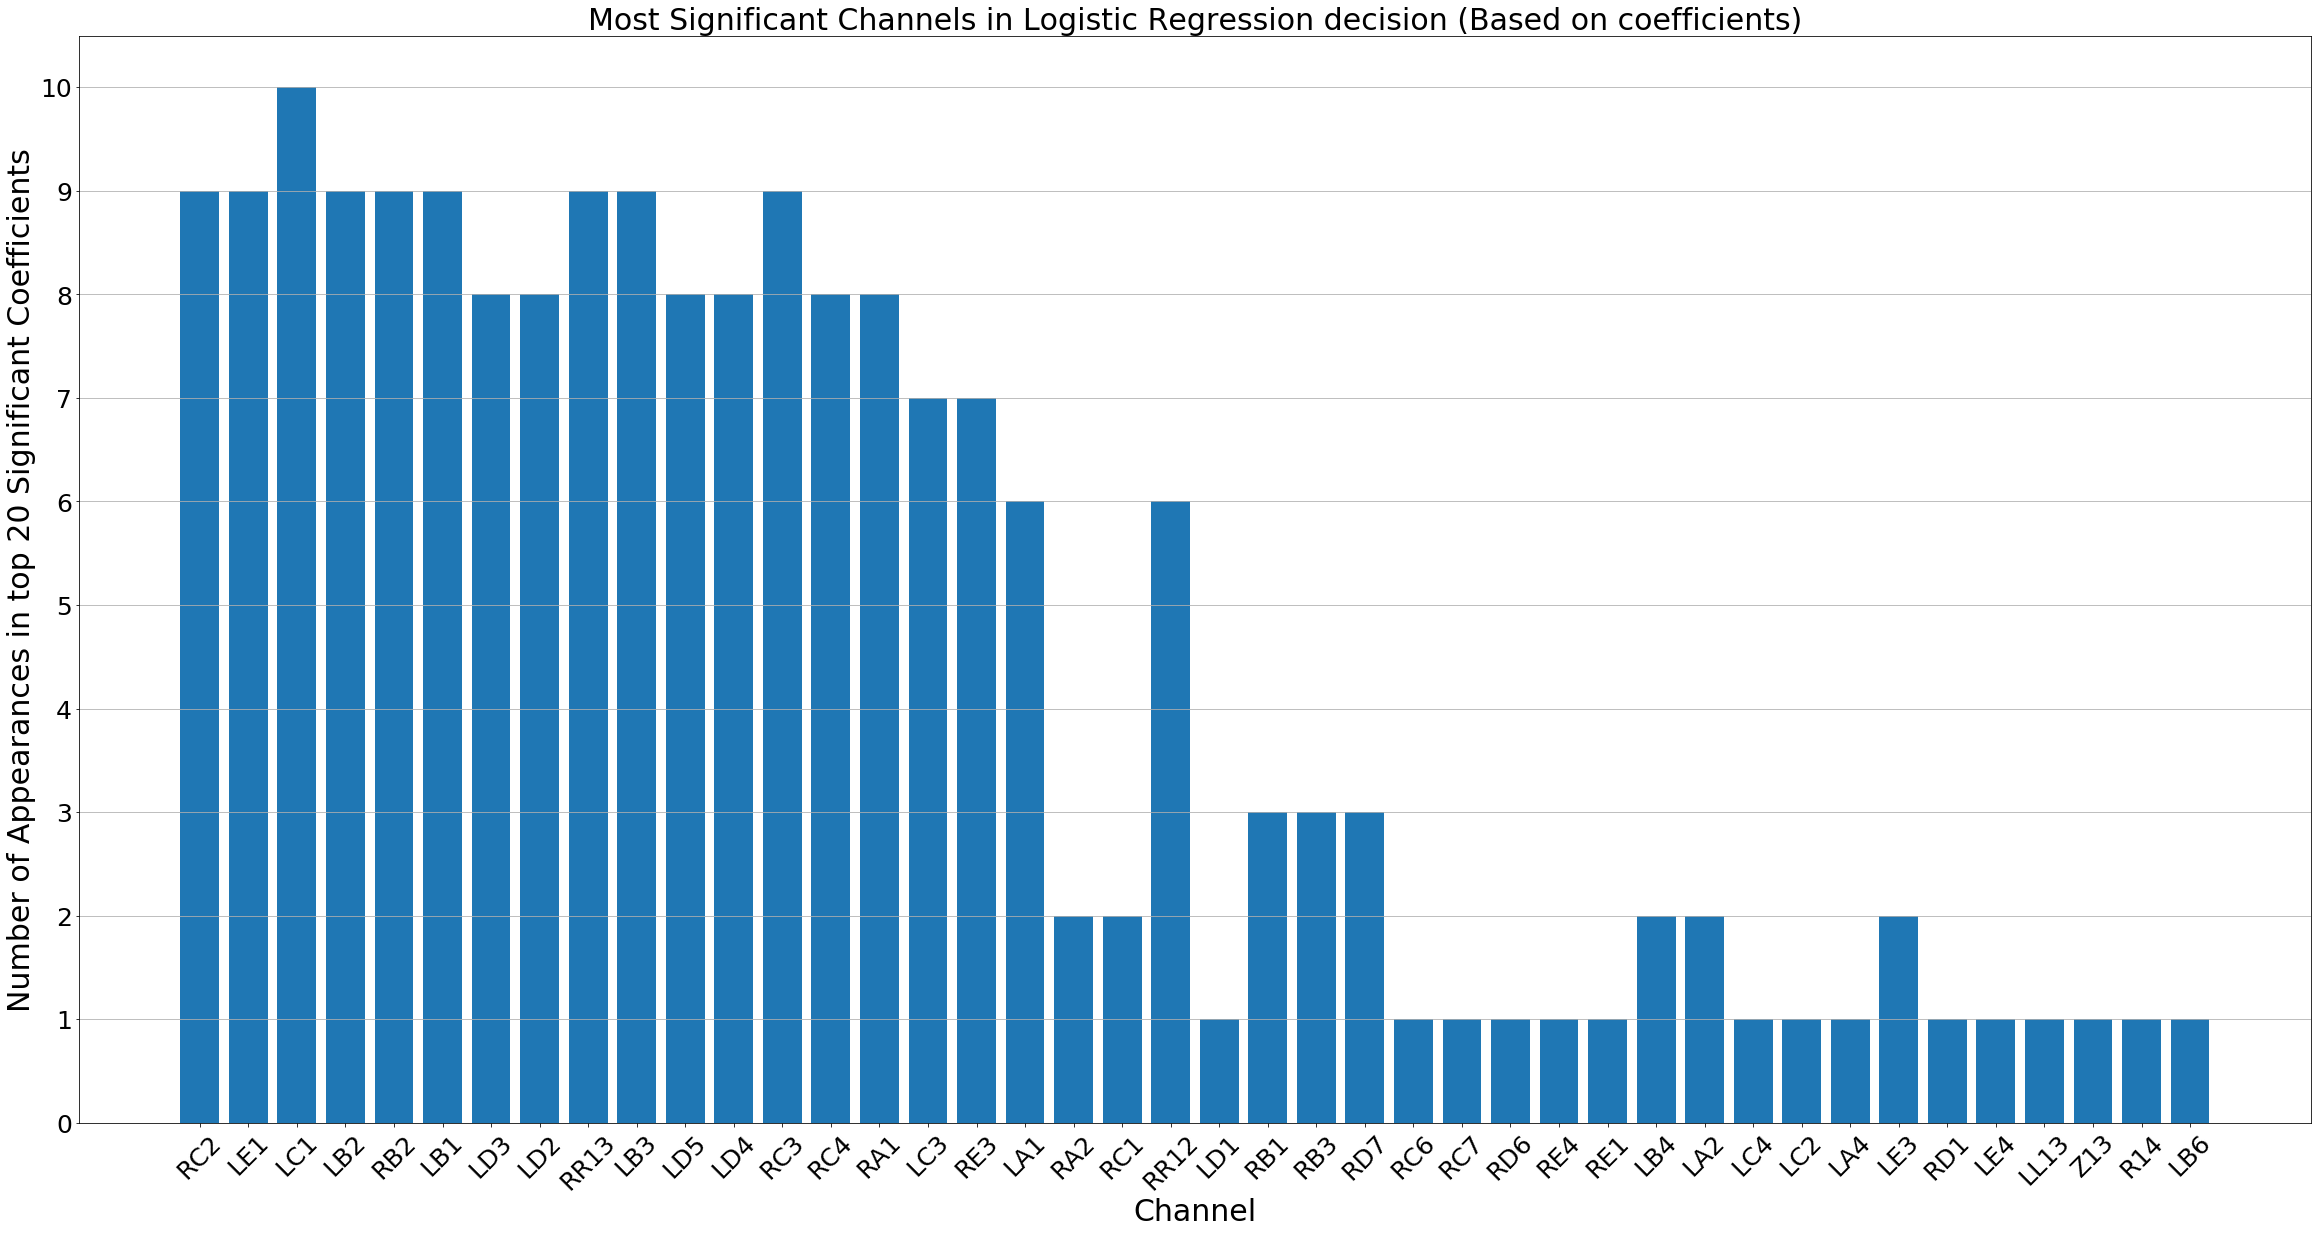

In [378]:
fig, ax = plt.subplots()

plt.bar(data.keys(), data.values())
ax.set_ylabel("Number of Appearances in top 20 Significant Coefficients", fontsize=30)
ax.set_xlabel("Channel", fontsize=30)
ax.set_title("Most Significant Channels in Logistic Regression decision (Based on coefficients)", fontsize=30)
ax.grid(True, axis='y')
plt.xticks(np.arange(0, len(data.keys())), data.keys(), rotation=45, fontsize=25);
plt.yticks(np.arange(0,11,step=1), fontsize=25 )
fig.set_figwidth(40)
fig.set_figheight(20)


matplotlib.rcParams.update({'font.size': 15})